In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1
## Delivery_time -> Predict delivery time using sorting time 

In [2]:
df = pd.read_csv('data/delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Visualising data

In [5]:
import warnings
warnings.filterwarnings('ignore')

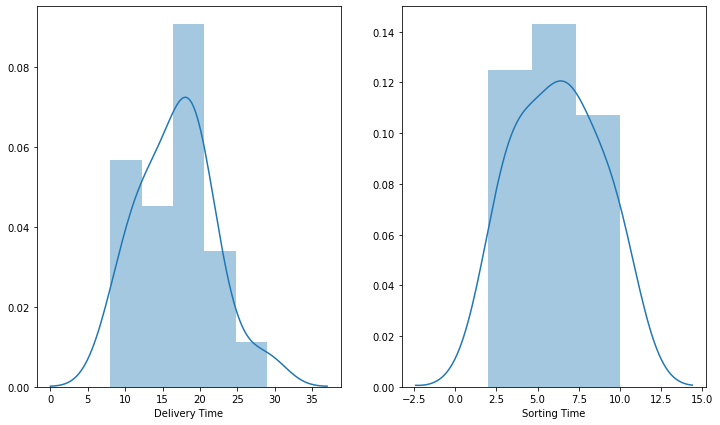

In [6]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.distplot(df.iloc[:,0])
plt.subplot(1,2,2)
sns.distplot(df.iloc[:,1])

Text(0, 0.5, 'Sorting Time')

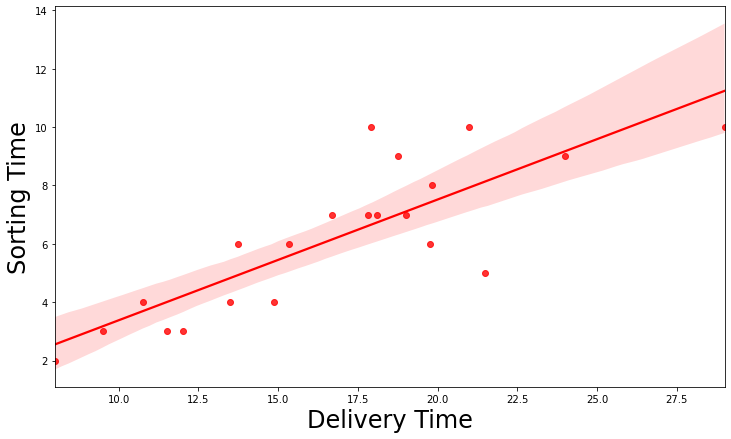

In [7]:
plt.figure(figsize = (12,7))
sns.regplot(x = df.iloc[:,0] , y= df.iloc[:,1] , color = 'r')
plt.xlabel('Delivery Time' , fontsize = 24)
plt.ylabel('Sorting Time' , fontsize = 24)

## It can be observed that the linear regression would be best fit for this model

## Correlation analysis

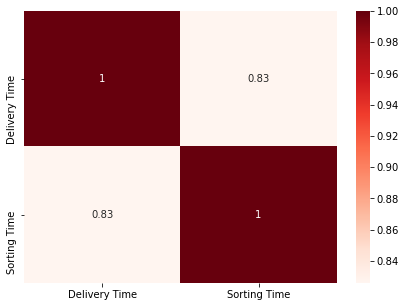

In [8]:
plt.figure(figsize = (7,5))
sns.heatmap(data=df.corr() , cmap = 'Reds' , annot = True)

In [9]:
# Renaming columns for easy accessibility
df.rename(columns={'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace=True)
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Fitting a linear regression model

In [10]:
import statsmodels.formula.api as smf
model = smf.ols('DT~ST', data = df).fit()

In [11]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [12]:
model.tvalues


Intercept    3.823349
ST           6.387447
dtype: float64

In [13]:
 model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [14]:
# R-squared value
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Predicting values

In [15]:
y_pred = model.predict()
y_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [16]:
pred_DT = pd.DataFrame(y_pred , columns= ['Predicted Delivery Time'])
to_concat = [df.iloc[:,1] , df.iloc[: ,0] , pred_DT]
predictions = pd.concat(to_concat, axis =1)

In [17]:
predictions.rename(columns = {'ST': 'Sorting Time', 'DT': 'Actual Delivery Time'}, inplace = True)
predictions

,Sorting Time,Actual Delivery Time,Predicted Delivery Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [18]:
print('Model accuracy = %.2f'%model.rsquared)

Model accuracy = 0.68


# Q2
## Salary_hike -> Build a prediction model for Salary_hike

In [19]:
df2 = pd.read_csv('data/Salary_Data.csv')
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [20]:
df2.shape

(30, 2)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


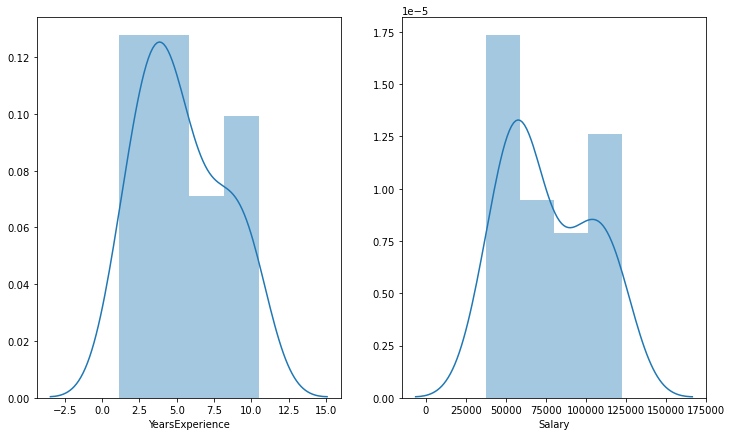

In [22]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.distplot(df2.iloc[:,0])
plt.subplot(1,2,2)
sns.distplot(df2.iloc[:,1])

Text(0, 0.5, 'Salary')

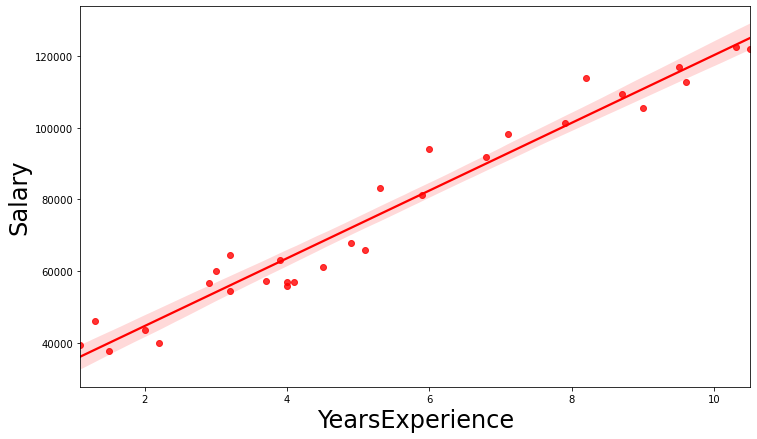

In [23]:
plt.figure(figsize = (12,7))
sns.regplot(x = df2.iloc[:,0] , y= df2.iloc[:,1] , color = 'r')
plt.xlabel('YearsExperience' , fontsize = 24)
plt.ylabel('Salary' , fontsize = 24)

## Linear regression model will be a good fit


# Correlation Analysis

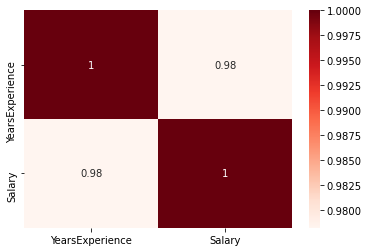

In [24]:
sns.heatmap(df2.corr() , annot = True , cmap = 'Reds')

# Fitting Linear Regression model

In [25]:
model2 = smf.ols('Salary~YearsExperience',data = df2).fit()

In [26]:
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
model2.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [28]:
model2.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [29]:
model2.rsquared , model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Predicting values

In [30]:
newdata = pd.Series([1,10,0])

In [31]:
to_pred1 = pd.DataFrame(newdata , columns = ['YearsExperience'])

In [32]:
to_pred1

,YearsExperience
0,1
1,10
2,0


In [33]:
y_pred1 = model2.predict(to_pred1)

In [34]:
y_pred1

0     35242.162520
1    120291.823413
2     25792.200199
dtype: float64

In [35]:
pred_Sal = pd.DataFrame(y_pred1 , columns= ['Predicted Salary'])
#to_concat = [df2.iloc[:,0] , df2.iloc[: ,1] , pred_DT]
to_concat1 = [to_pred1 , pred_Sal]
predictions1 = pd.concat(to_concat1, axis =1)

In [36]:
predictions1

,YearsExperience,Predicted Salary
0,1,35242.162520
1,10,120291.823413
2,0,25792.200199
